In [13]:
## Options
import pandas as pd
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

%load_ext autoreload
%autoreload 2

## Data Loading
filePath = r'/Users/decolvin/Downloads/GBSF Data 061318.csv'
#data = pd.read_excel(filePath, header=0, index_col=0, parse_dates=True)
data = pd.read_csv(filePath, header=0, index_col=0, parse_dates=True)
print(data.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index([u'chw', u'steam', u'ele', u'OAT'], dtype='object')


In [14]:
## Imports

## Mac imports
import sys
toolPath = r'/Users/decolvin/Box Sync/UCD_ECO_coding/mypy'
sys.path.append(toolPath)

## Main Imports
import mnv12 as mnv
print(mnv.version)
import matplotlib.pyplot as plt
print("Success!")

Version 1.2
Success!


# Data Section

In [15]:
data.head()

,chw,steam,ele,OAT
DateTime,,,,
2014-01-01 00:00:00,NaN,NaN,763.784922,43.601352
2014-01-01 01:00:00,NaN,NaN,774.602466,43.697068
2014-01-01 02:00:00,NaN,NaN,770.825713,42.367405
2014-01-01 03:00:00,NaN,NaN,777.338390,41.332300
2014-01-01 04:00:00,NaN,NaN,774.980198,40.331405


Q(75%): 903.41 Q(25%): 775.42
IQR value is 127.99
Ceiling adjusted by IQR - Now 1543.35
Floor adjusted by IQR   - Now 135.48


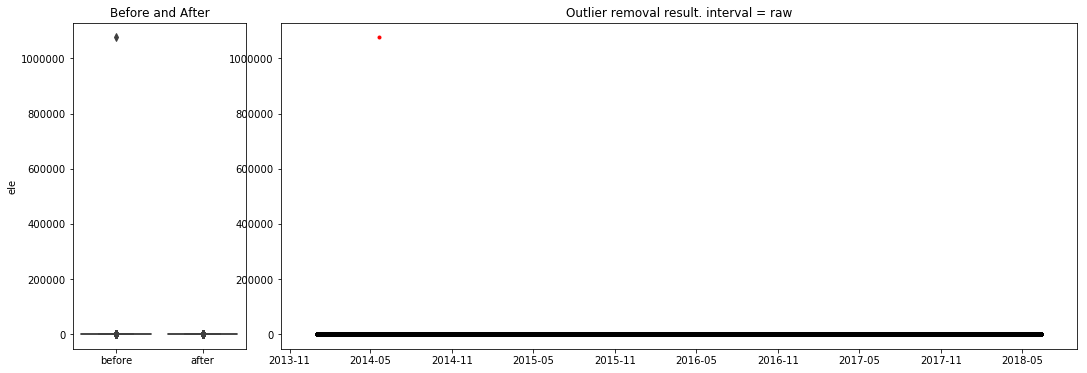

ON FILE


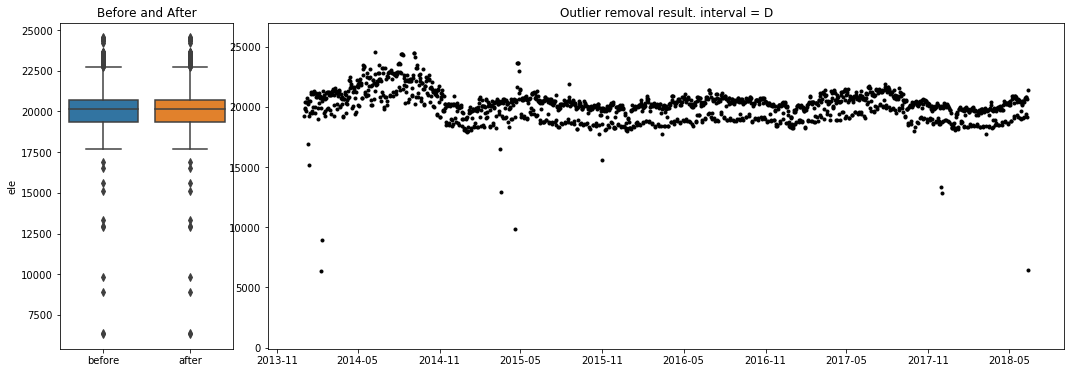

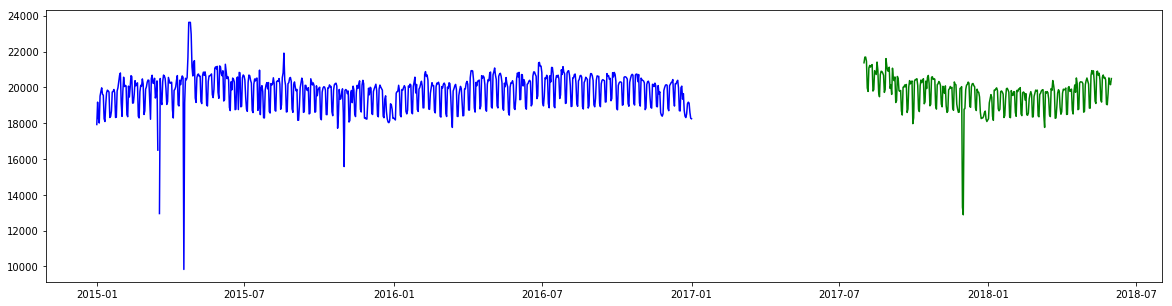

In [28]:
inputDict = {'IQRmult' : 5.0,
                 'IQR' : 'y',
                 'resampleRate' : 'D',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2017-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2015-01-01','2017-01-01','2017-08-01','2018-06-01'],
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}

dc = mnv.data_handler(data[data.columns[2]], inputDict)
dc.default_clean()


## Run the next line incase the y-range is FUBAR
dc._outlier_plot(dc.modifiedData[dc.com], yrange=(-100,dc.modifiedData[dc.com].max()*1.1)) 
plt.show()

#Show splitting
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

# Many Linear Models

In [29]:
pd.Series(data=dc.pre.columns)

0          ele
1          HDH
2          CDH
3         HDH2
4         CDH2
5         year
6        month
7          day
8         hour
9       minute
10     weekday
11     daytime
12     weekend
13    saturday
14      sunday
dtype: object

        AIC       AR2        R2     cvrmse postDiff                               params                                            summary
14  9337.17  0.504365  0.515417   0.035822  15571.9         HDH2 + C(month) + C(weekend)                              OLS Regression Res...
0   9337.32  0.505071  0.516956  0.0357965  16160.7  CDH2 + HDH2 + C(month) + C(weekend)                              OLS Regression Res...
23  9338.71  0.503892  0.515805  0.0358391  15271.9   CDH + HDH2 + C(month) + C(weekend)                              OLS Regression Res...


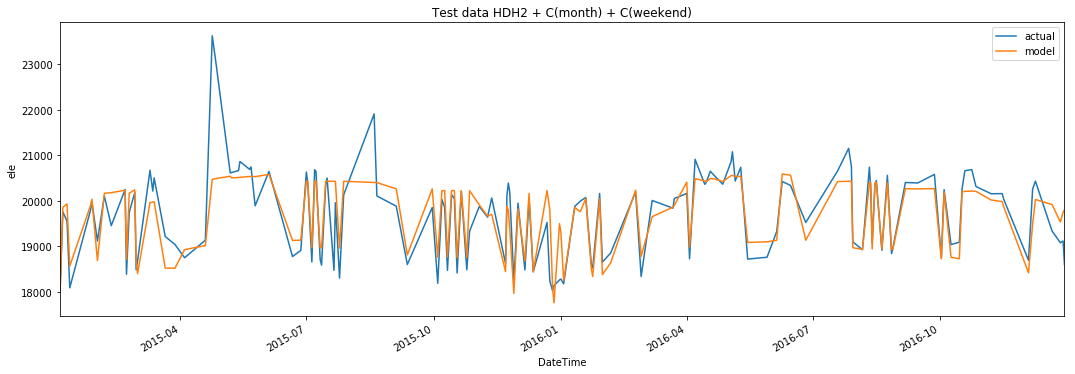

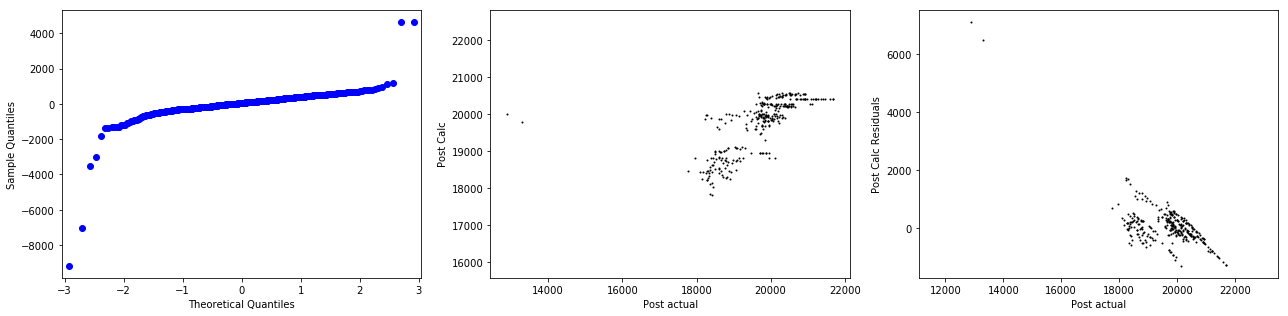

In [30]:
modelDict = {'params': 'CDH + HDH + CDH2 + HDH2 + C(month) + C(weekend)',
             'testTrainSplit': 'random',
             'randomState': 4291990,
             'testSize': 0.2,
             'commodityRate': 0.056,
             'paramList': ['','C(month)','C(weekend)']
            }

allmod = mnv.many_ols(dc.pre, dc.post, modelDict)

allmod.run_all_linear()
print(allmod.statsPool[0:3])
allmod.plot_pool(1)
modelDict['params'] = allmod.statsPool.iloc[0]['params']

# Single Linear Model

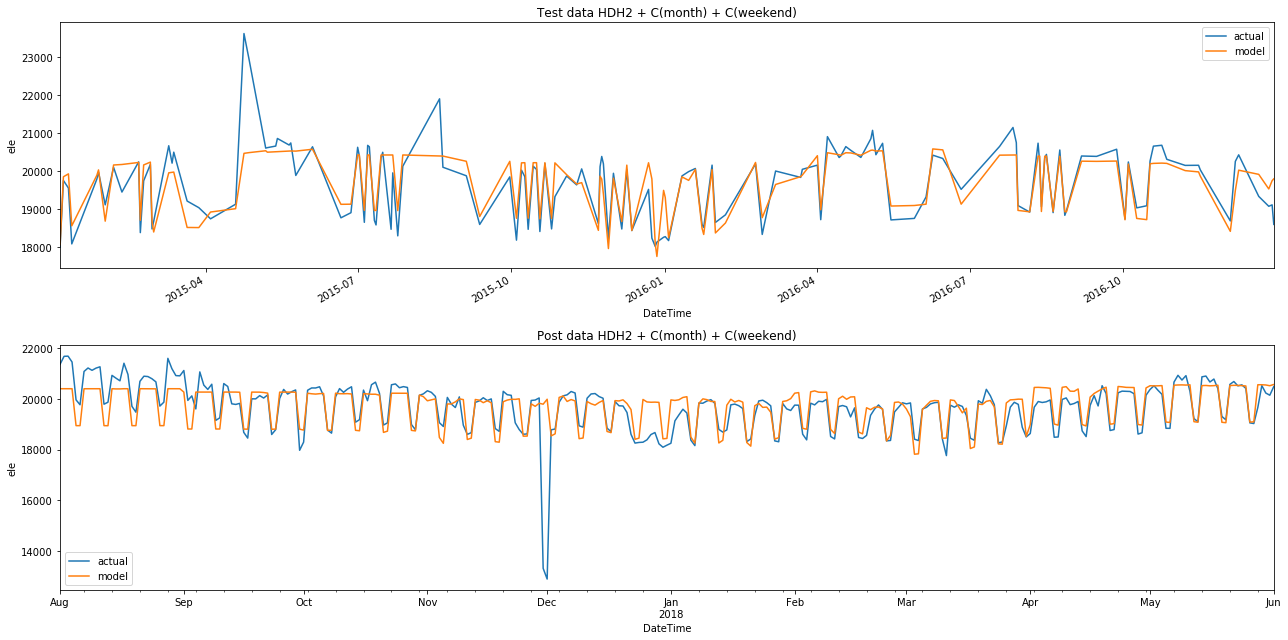

                 VIF
const      24.139517
HDH2        2.948749
month_2     2.173936
month_3     2.552317
month_4     2.506917
month_5     2.641027
month_6     2.854202
month_7     2.602173
month_8     2.761170
month_9     2.873690
month_10    2.509024
month_11    2.008879
month_12    1.907789
weekend_1   1.004254


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ele   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     46.64
Date:                Thu, 14 Jun 2018   Prob (F-statistic):           6.67e-81
Time:                        15:35:53   Log-Likelihood:                -4654.6
No. Observations:                 584   AIC:                             9337.
Df Residuals:                     570   BIC:                             9398.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         2.02e+04    143.973    140.285      0.000    1.99e+04    2.05e+04
C(month)[T.2]     130.8017    158.933      0.823      0.411    -181.363     442.967
C(month)[T.3]    -196.0669    163.513     -1.199      0.231    -517.229     125.095
C(month)[T.4]     295.8434    169.044      1.750      0.081     -36.181     627.868
C(month)[T.5]     363.5443    171.887      2.115      0.035      25.935     701.153
C(month)[T.6]     398.1378    172.462      2.309      0.021      59.399     736.876
C(month)[T.7]     234.1287    177.380      1.320      0.187    -114.270     582.527
C(month)[T.8]     206.5444    174.152      1.186      0.236    -135.513     548.601
C(month)[T.9]      73.9577    171.600      0.431      0.667    -263.088     411.004
C(month)[T.10]     30.7035    175.982      0.174      0.862    -314.948     376.355
C(month)[T.11]   -156.0811    149.906     -1.041      0.298    -450.516     138.354
C(month)[T.12]    125.0550    150.353      0.832      0.406    -170.258     420.368
C(weekend)[T.1] -1459.1303     65.636    -22.231      0.000   -1588.049   -1330.212
HDH2               -0.0034      0.001     -4.037      0.000      -0.005      -0.002
==============================================================================
Omnibus:                      672.857   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133707.862
Skew:                          -5.041   Prob(JB):                         0.00
Kurtosis:                      76.438   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mod = mnv.ols_model(dc.pre, dc.post, modelDict)
mod.model_plot()


plt.show() # Show plot before Stats summary
print(mod.vif)
mod.Fit.summary()

### Savings

Savings = $-250767.65


/Users/decolvin/anaconda/envs/MnV_Stuff/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


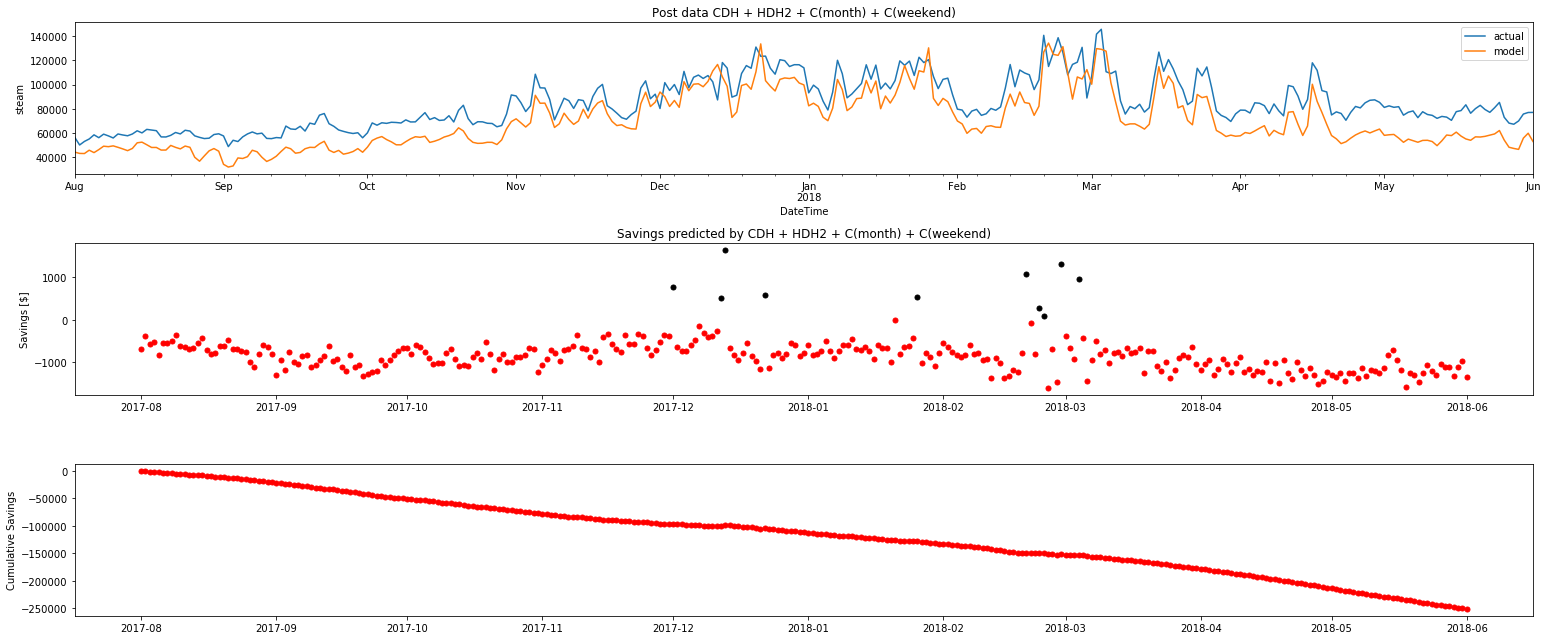

In [20]:
#rates = {'chw':0.056, 'steam':0.0157, 'elec':0.030} #kBTU prices for 2016(?)
#commodity = 'chw'

print("Savings = $" +str(round(mod.postCumsum * mod.params.commodityRate,2)))
mod.savings_plot(yaxis='dollars',pointSize=10)